# 랜덤포레스트_분류

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# warning 숨기기
import warnings
warnings.filterwarnings(action='ignore')


# train, test를 분할하기 위한 함수
from sklearn.model_selection import train_test_split, GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix

# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family = "nanumGothic")

# sklearn.ensemble 의 RandomForestClassifier: 분류랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# sklearn.tree의 export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz

# graphviz import: 의사결정 나무 모델 시각화  .dot 확장자 파일 불러오는 패키지
import graphviz

In [5]:
df_raw = pd.read_csv("./Data/유방암.csv" , engine = "python", encoding = 'cp949')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [6]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [7]:
df_raw_y = df_raw["diagnosis"] 
df_raw_x = df_raw.drop('diagnosis', axis = 1)
df_raw_y = np.where(df_raw_y == "음성", 0, 1)

In [8]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## 랜덤포레스트 모델 생성

In [9]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.922


training accuracy가 1인 것을 보아 해당 모델에 과적합된 것을 볼 수 있다.

**n_estimators parameter 조정**

In [10]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# n_estimators: 트리 수 변경에 따른 모델 성능 변화
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,1.000,0.922
1,20,0.995,0.906
2,30,1.000,0.914
3,40,1.000,0.914
4,50,1.000,0.922
5,60,1.000,0.922
6,70,1.000,0.914
7,80,1.000,0.914
8,90,1.000,0.922
9,100,1.000,0.922


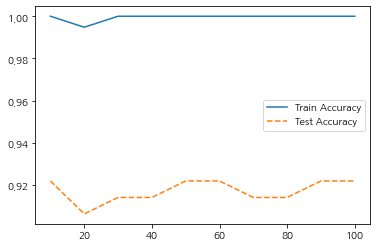

In [11]:
# 정확도를 그래프로 표현
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

train accuracy와 test 간의 gap을 생각해서 50 혹은 100으로 선정

n_estimators에 따른 oob error 변화

Text(0.5, 0, 'n_estimators')

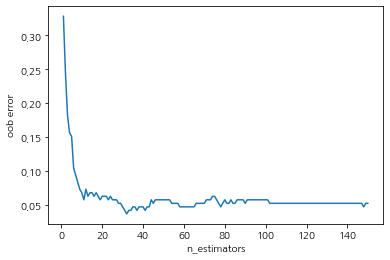

In [23]:
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)
    
plt.plot(range(1, 151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

앞선 결과와 합쳐서 oob error 그래프를 통해 n_estimators를 100으로 선정 

**max_depth parameter 선정*

In [45]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = max_depth, n_estimators = 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.953,0.922
1,2,0.974,0.906
2,3,0.990,0.906
3,4,1.000,0.914
4,5,1.000,0.922
5,6,1.000,0.922
6,7,1.000,0.922
7,8,1.000,0.922
8,9,1.000,0.922
9,10,1.000,0.922


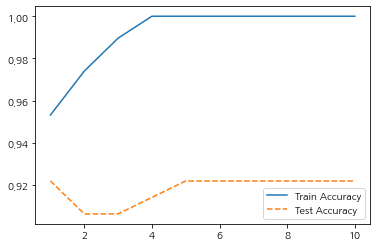

In [46]:
# 정확도를 그래프로 표현
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

depth가 5부터 saturation 되는 것을 보아 max_depth를 5로 설정

**min_samples_leaf parameter 조절**

In [47]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_leaf: 잎사귀 수 제한
para_leaf = [n_leaf * 5 for n_leaf in range(1, 11)]

for min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_estimators = 100, max_depth=5, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)


,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,5,0.979,0.906
1,10,0.969,0.906
2,15,0.958,0.914
3,20,0.958,0.914
4,25,0.953,0.914
5,30,0.953,0.898
6,35,0.948,0.906
7,40,0.953,0.922
8,45,0.953,0.914
9,50,0.964,0.914


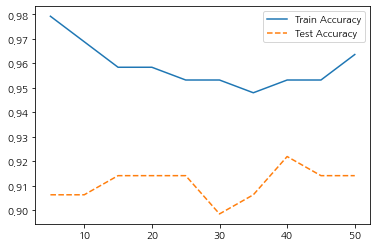

In [48]:
# 정확도를 그래프로 표현
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

MinSamplesLeaf는 40으로 설정

**mean_samples_split parameter 설정**

In [49]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# min_samples_split: 분할하기 위한 노드의 최소 샘플 수 
para_split = [n_split * 20 for n_split in range(1, 11)]

for min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split=min_samples_split, n_estimators = 100, min_samples_leaf = 40, max_depth = 5, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.953,0.922
1,40,0.953,0.922
2,60,0.953,0.922
3,80,0.953,0.922
4,100,0.953,0.922
5,120,0.953,0.914
6,140,0.599,0.758
7,160,0.599,0.758
8,180,0.599,0.758
9,200,0.599,0.758


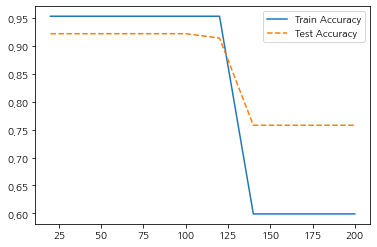

In [50]:
# 정확도를 그래프로 표현
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

mean_sampels_split은 설정하지 않는다.

In [51]:
rf_final = RandomForestClassifier(n_estimators = 100, max_depth = 5, min_samples_leaf = 20)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.898

Confusion matrix: 
[[92  5]
 [ 8 23]]


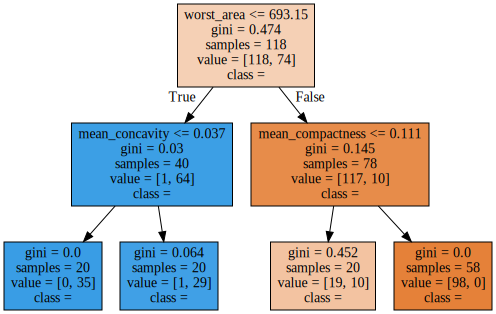

In [55]:
# tree_final.dot으로 결과 저장
export_graphviz(rf_final[0], out_file="rf_final.dot", class_names = ["음성", "양성"],
                feature_names = df_raw_x.columns, impurity = True, filled = True)

# tree_final.dot 그리기
with open("rf_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

앞선 의사결정나무와 달리 worst_area, mean_concavity 등이 중요한 변수로 작용하는 것을 보인다.

In [58]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = df_raw_x.columns
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
6,mean_concavity,0.177
22,worst_perimeter,0.140
7,mean_concave_points,0.136
27,worst_concave_points,0.100
20,worst_radius,0.090
23,worst_area,0.089
26,worst_concavity,0.069
2,mean_perimeter,0.055
13,area_error,0.031
10,radius_error,0.027


Text(0, 0.5, '설명변수')

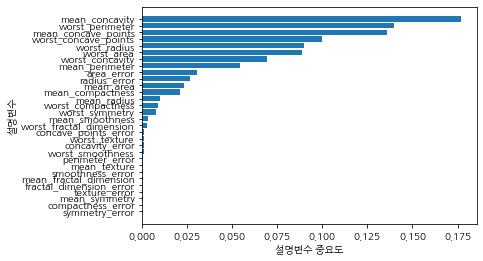

In [59]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")


**GridSearchCV를 이용해 최적 parameter를 찾는다**

In [60]:
estimator = RandomForestClassifier(random_state = 1234)
param_grid = {"max_depth": para_depth,
              "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=1, min_samples_leaf=35, min_samples_split=20,
                       random_state=1234)

best parameter: 
{'max_depth': 1, 'min_samples_leaf': 35, 'min_samples_split': 20}

best score: 
0.953


In [61]:
rf_final2 = RandomForestClassifier(n_estimators = 100, max_depth = 1, min_samples_leaf = 35, min_samples_split = 20)
rf_final2.fit(df_train_x, df_train_y)

y_pred2 = rf_final2.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(rf_final2.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred2)))

Accuracy: 0.906

Confusion matrix: 
[[92  5]
 [ 7 24]]


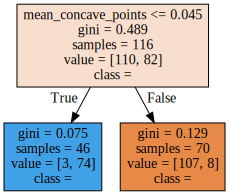

In [62]:
# tree_final.dot으로 결과 저장
export_graphviz(rf_final2[0], out_file="rf_final2.dot", class_names = ["음성", "양성"],
                feature_names = df_raw_x.columns, impurity = True, filled = True)

# tree_final.dot 그리기
with open("rf_final2.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

>결론  
의사결정나무의 경우 최적 파라미터로 생성한 모델의 depth가 3이었는데 같은 데이터에 대해 랜덤 포레스트 모델을 적용했더니 한 번의 분류로 90.6%의 정분류율을 보였다. 다만 이전 모델에서도 말했듯이 의료 데이터로 암의 양성, 음성을 판별하는 문제는 정확도가 보통의 분류 모델보다 월등히 높아야 하므로 이 모델 역시 정확도를 높일 필요가 있다고 생각된다. 